In [1]:
import numpy as np
from PIL import Image
import cv2
from image_utils import base642image,image2base64
from matplotlib import pyplot as plt

In [10]:
# target=np.array(Image.open('/home/dl/yolo8/nest/train/images/13_jpg.rf.3e4500f15e7c7acb8ec93aada8e4ae24.jpg'),dtype=np.int64)
img = cv2.imread('/home/dl/yolo8/nest/train/images/13_jpg.rf.3e4500f15e7c7acb8ec93aada8e4ae24.jpg')

In [11]:
img_raw_b64 = image2base64(img_raw)

array([[[245, 227, 204],
        [247, 229, 206],
        [251, 230, 209],
        ...,
        [105, 134, 143],
        [119, 146, 156],
        [ 57,  84,  94]],

       [[247, 229, 206],
        [247, 229, 206],
        [248, 227, 206],
        ...,
        [112, 141, 150],
        [119, 146, 156],
        [ 67,  94, 104]],

       [[253, 234, 213],
        [249, 230, 209],
        [247, 226, 205],
        ...,
        [109, 138, 147],
        [118, 145, 155],
        [ 93, 120, 130]],

       ...,

       [[ 68,  68,  68],
        [111, 111, 111],
        [140, 140, 140],
        ...,
        [255, 218, 140],
        [255, 218, 140],
        [255, 218, 140]],

       [[ 87,  87,  87],
        [141, 141, 141],
        [139, 139, 139],
        ...,
        [255, 218, 140],
        [255, 218, 140],
        [255, 218, 140]],

       [[111, 111, 111],
        [149, 149, 149],
        [130, 130, 130],
        ...,
        [255, 218, 140],
        [255, 218, 140],
        [255, 218, 140]]

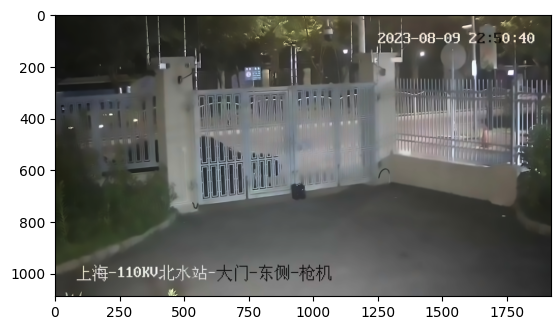

In [2]:
img = cv2.imread('/home/dl/sh_cv_robot/dataset/pic/door/8261691646865_.pic.jpg')
result = cv2.fastNlMeansDenoisingColored(img, None, 15, 15, 10, 30)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

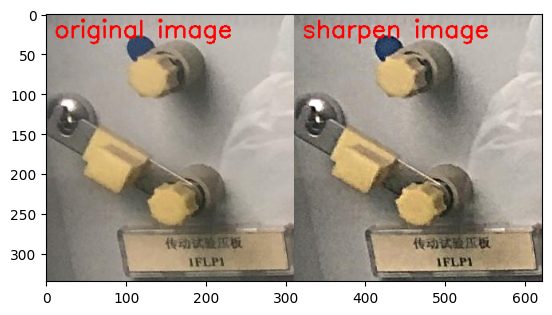

In [2]:
import cv2 as cv
import numpy as np
#USM锐化增强方法(Unsharpen Mask)
#先对原图高斯模糊，用原图减去系数x高斯模糊的图像
#再把值Scale到0~255的RGB像素范围
#优点：可以去除一些细小细节的干扰和噪声，比卷积更真实
#（原图像-w*高斯模糊）/（1-w）；w表示权重（0.1~0.9），默认0.6
src = cv.imread("./dataset/pic/test/1.jpg")
# cv.imshow("input", src)

# sigma = 5、15、25
blur_img = cv.GaussianBlur(src, (0, 0), 5)
usm = cv.addWeighted(src, 1.5, blur_img, -0.5, 0)
#cv.addWeighted(图1,权重1, 图2, 权重2, gamma修正系数, dst可选参数, dtype可选参数)
# cv.imshow("mask image", usm)

h, w = src.shape[:2]
result = np.zeros([h, w*2, 3], dtype=src.dtype)
result[0:h,0:w,:] = src
result[0:h,w:2*w,:] = usm
cv.putText(result, "original image", (10, 30), cv.FONT_ITALIC, 1.0, (0, 0, 255), 2)
cv.putText(result, "sharpen image", (w+10, 30), cv.FONT_ITALIC, 1.0, (0, 0, 255), 2)
#cv.putText(图像名，标题，（x坐标，y坐标），字体，字的大小，颜色，字的粗细）
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))